In [ ]:
pip install summarytools

In [2]:
import pandas as pd
import numpy as np
from summarytools import dfSummary

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
np.random.seed(0)

cubagem_data = pd.DataFrame({

    'ID do Pacote': range(1, 101),
    'Peso': np.random.uniform(1, 50, 100),
    'Altura': np.random.uniform(10, 100, 100),
    'Largura': np.random.uniform(10, 100, 100),
    'Profundidade': np.random.uniform(10, 100, 100),
    'Tipo de Produto': np.random.choice(['Eletrônicos', 'Farmacêuticos', 'Vestuário'], 100),
    'Fragilidade': np.random.choice([True, False], 100),
    'ID do Veículo': np.random.choice(['V1', 'V2', 'V3'], 100),
    'Capacidade do Veículo': np.random.choice([200, 300, 400], 100)

})


# Gerar dados para otimização do tamanho de embalagens

np.random.seed(1)

embalagens_data = pd.DataFrame({

    'ID do Produto': range(1, 101),
    'Altura': np.random.uniform(5, 50, 100),
    'Largura': np.random.uniform(5, 50, 100),
    'Profundidade': np.random.uniform(5, 50, 100),
    'Peso do Produto': np.random.uniform(0.5, 25, 100),
    'Material de Embalagem': np.random.choice(['Papelão', 'Plástico', 'Isopor'], 100),
    'Custo por Unidade de Material': np.random.uniform(0.1, 1.0, 100),
    'Volume de Vendas': np.random.randint(100, 1000, 100)

})


# Gerar dados para eficiência na rota de entregas

np.random.seed(2)

entregas_data = pd.DataFrame({

    'ID da Entrega': range(1, 101),
    'ID do Veículo': np.random.choice(['V1', 'V2', 'V3', 'V4'], 100),
    'Local de Partida': np.random.choice(['CD1', 'CD2', 'CD3'], 100),
    'Destino da Entrega': np.random.choice(['Local A', 'Local B', 'Local C', 'Local D', 'Local E'], 100),
    'Distância': np.random.uniform(10, 300, 100),  # Distância em km
    'Tempo Estimado de Viagem': np.random.uniform(30, 240, 100),  # Tempo em minutos
    'Condições de Tráfego': np.random.choice(['Baixo', 'Médio', 'Alto'], 100)

})


# Exibir os primeiros registros

print("Embalagens Data:")
print(embalagens_data.head().to_markdown(index=False))

print("\nCubagem Data:")
print(cubagem_data.head().to_markdown(index=False))

print("\nEntregas Data:")
print(entregas_data.head().to_markdown(index=False))

Embalagens Data:
|   ID do Produto |   Altura |   Largura |   Profundidade |   Peso do Produto | Material de Embalagem   |   Custo por Unidade de Material |   Volume de Vendas |
|----------------:|---------:|----------:|---------------:|------------------:|:------------------------|--------------------------------:|-------------------:|
|               1 | 23.766   |   19.699  |        47.7579 |           20.3905 | Papelão                 |                        0.984176 |                567 |
|               2 | 37.4146  |   28.7176 |        30.0494 |           21.9366 | Papelão                 |                        0.339975 |                395 |
|               3 |  5.00515 |   44.8674 |        46.2023 |           17.3661 | Plástico                |                        0.580288 |                966 |
|               4 | 18.605   |   21.0771 |        33.8705 |           14.4526 | Isopor                  |                        0.38302  |                227 |
|               5

## Analise dados Embalagens

In [4]:
dfSummary(embalagens_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID do Produto[int64],Mean (sd) : 50.5 (29.0)min < med < max:1.0 < 50.5 < 100.0IQR (CV) : 49.5 (1.7),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Altura[float64],Mean (sd) : 26.9 (13.3)min < med < max:5.0 < 26.2 < 49.5IQR (CV) : 23.0 (2.0),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACpElEQVR4nO3cv27aUBiG8e9AQOaPbCFU2Fg6VurgkYvoxfYSOnAFDF06sSEhywg3Fsa4SzNUjRKOj09yPvL89hM8PHJ4Y4hpmkaA0PXe+wKAWzy89wWEyhgzEpFhy+Pnpmkeu7yej45Qn2GMGc3n829xHM/anD8ej5kx5juxdodQnzeM43i2Xq8fkyQpbQ7meR5tNpvZ4XAYigihdoRQX5AkSblYLH63ODrq/GI+OMYUVPB6R3UcJCKMElV8DlBvoboOEhFGiSa+B6jPO2rrQSLCKFHI6wD1PqYcBokIo0QdXwOUMQUVCBUqvPqr32HJxdfrddDiHPCfF0N1WXJVVUV1XX8py/KHiLR9jwqIyOt31NZLbrfbzbbb7fhyufQdrg8QkRtXf5sll2UZix2dYUxBBT6U4kFd1wMRiY0xbY73ROTq8PIu54N9ZE2oHSuKYlBV1dfVatXv9/tW7+vruh4URfF5Op3+6vV6le1ru54P+ZE1oXbsfD4/RFE0TtO0XC6Xmc3ZvwP0U5qmP23Pup4P/ZE1oXoymUxaD9A2Z7s4LwE/smZMQYWg76iOoyTYYQB7wYbqMkpEwh4GsBdsqC6jJPRhAHvBhvrkHocB7DGmoAKhQgVChQqEChUIFSoQKlQI/s9TeDuOTwK9fkeOUCEi7k8CfX9HjlAhIm5PAkX8f0eOUPEP148Y+sKYggp3e0cNeRjA3l2GGvowgL27DDX0YQB7dxnqk1CHAewxpqACoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKN/3vqTzPI9sffDqdIhGRoiii/X4/fsvzWl9b63W7nr+lrz84IKDRtFW7GgAAAABJRU5ErkJggg=="">",0(0.0%)
3,Largura[float64],Mean (sd) : 26.8 (14.3)min < med < max:5.6 < 29.8 < 49.9IQR (CV) : 25.1 (1.9),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAChUlEQVR4nO3cQYriQBSA4VdjK1EhQQTdeYGBWbj0EHPYOcIsPIE3cCeIREx3MMb0pmdgaGm1Yo31qv5v3UlH+NGq5BHTNI0Avvv27AsAbvFy7Q+MMX0R6Vme/9g0zZvlscBfX4ZqjOmPx+OfaZqObE6+3+93xphfxIq2rn2j9tI0HS0Wi7csy8p7TpznebJcLkfb7bYnIoSKVq7+9IuIZFlWTiaTV4vz9y2OAT5hMwUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqHDTUAruE+sMr8vPTagPFusMr+vPTaiPF+sMr9PPTaiOxDrD6+pzs5mCCoQKFQgVKhAqVPB6MxXr/Uh85m2osd6PxGXehirx3o/EBT6HKiLx3o/Ev5yGWtd1V0RSY4zN4en5fO4++JKCF+q63lmoRVF0q6r6MZvNOp1O566fbhGRqqqSuq6/l2X5W0RsvlGjE/K63lmox+PxJUmSwXw+L6fT6e7e49fr9Wi1Wg1Op1PHxfUFKth1vfM16nA4tFpj7nY71piWQlzXe7+Zis0z1/U+7ykI1SPPXNf7vqcgVI88c13v+56CUD30zHW9r3sKhlKgAqFCBUKFCoQKFQgVKhAqVCBUqBDsfdSWjwNFPB55i1GQobZ9HCji98hbjIIMte3jQN9H3mIUZKh/2D4O/ODtyFuM2ExBBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoEPZTSRot5Vl6X6QChXtBmnpXXZbpBqBe0mWfldZluEOoXbOZZeV2mG2ymoAKhQgVChQqEChVu2kzleZ7ce+LD4ZCIiBRFkWw2m8H/PF7r/9Z63W2Pv6Wvd6yJvMJETQ71AAAAAElFTkSuQmCC"">",0(0.0%)
4,Profundidade[float64],Mean (sd) : 30.0 (12.5)min < med < max:5.0 < 30.8 < 49.2IQR (CV) : 20.7 (2.4),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAClElEQVR4nO3czaraQByG8f/oUeIHEZHqzk2XhS5cehG92F5CF16Bi266cieIREyPGKPd1GLh+JFETd74/LYyniE8eJhhJu5wOBhQdJW8JwDc4i3vCaA8nHMNM6unHL49HA7v5z4kVNyFc67R6/

## Analise dados Cubagem

In [5]:
dfSummary(cubagem_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID do Pacote[int64],Mean (sd) : 50.5 (29.0)min < med < max:1.0 < 50.5 < 100.0IQR (CV) : 49.5 (1.7),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Peso[float64],Mean (sd) : 24.2 (14.2)min < med < max:1.2 < 23.9 < 49.4IQR (CV) : 23.5 (1.7),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACr0lEQVR4nO3cu47aQBSA4TOwrMxFthAKdDQpI6VwyUPkYfMIKXgCijSp6JAQMsJZC2OcJiiJtBfsYdg5k//rbWzrlzXjGWHquhbAd533vgDgGg/vfQH4lzGmLyKPFqc41nX9dKvr8QWhesQY059MJl/iOB63Pcd+v98ZY76GFiuh+uUxjuPxYrF4SpKkaHpwlmXRcrkcb7fbRxEhVLiVJEkxnU5/tjy8f9OL8QSTKajw5hvVcnAf5MAe9/dqqLaD+1AH9ri/t96orQf3IQ/scX9XTaYsBvdBDuxxf0ymoILTz1NVVfVEJDbGtD0FkzGIiMNQ8zzvlWX5eT6fd7vdbuOP1yJMxvCHs1CPx+NDFEWDNE2L2Wy2a3o8kzH8zfnK1HA4ZJUF1phMQQXW+h2wWM2Lz+dz79bXEwJCvTGb1byyLKOqqj4VRfFNRNoOl4JEqLfXejVvvV6PV6vV4HQ6dV1dnFaE6kib1bzdbsfk8QWE+gLGmc253GlHqM9gnNmc6512hPo8xpnNOd1pR6ivYJzZnKuddnzwhwpev1Etd1+x8yog3oZqu/uKnVdh8TZUm91X7LwKj7ehXljsvvqvJzWhYTIFFQgVKhAqVCBUqECoUIFQoYL3n6faslzVUrtVz/K+OyJybvnTTp9ZkKHarmpp3apnc99VVfXyPP84Go1+dDqdsulvu35mQYZq+58CWrfq2dz373v+kKbpdx+fWZChXrRd1dK+Va/NfV/u2ddnxmQKKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQocJV/+aXZVnU9MSHwyESEcnzPNpsNoN7Hq/1t7Vet+3x1/T1C997qdoIVVPOAAAAAElFTkSuQmCC"">",0(0.0%)
3,Altura[float64],Mean (sd) : 57.5 (25.0)min < med < max:11.1 < 61.8 < 99.9IQR (CV) : 39.1 (2.3),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrElEQVR4nO3cv27aUBiG8e9AQOaPjBAqbCwdK3Vg5CJ6sb2EDlwBQ5dMbEgIgXCDMIYurdRKEdg+Dj4ven77IWd45OTL58Rdr1cDQteo+wJAHi91XwD/c851zKzt8RGn6/X6VtV9QkGoAXHOdUaj0bc4jodlP2O/32+dc9+fLVZCDUs7juPhfD5/GwwGx6KHd7tdtFgshpvNpm1mhIqPNRgMjuPx+FfJ451KLxMIhilICPqJ6jlY1DZUeNw7vlwurarvk1fIg1ywofoOFnUNFT73TtM0yrLsy/F4/GFmZb/1lxL6IBdsqOYxWNQ8VJS+92q1Gi6Xy+75fG5+1OVuCHqQCzlUM/MaLGodKsrce7vd1j4IhTrIMUxBAqFCAqFCAqFCAqFCAqFCAqFCQvC/R62L6ho0y7KWmcXOuaJHa733PYT6DtU1aJIkrTRNv06n02az2Sy0Xarz3nkQ6vsk16Cn0+kliqLubDY7TiaTbZGzNa9v7yLUG1TXoL1eT/LetzBMQQJPVFTGY5Azu/MuK6GiEj6DnNn9d1kJFZXwGeTyvMtKqKhUmUHuj5vDHMMUJNx9onr+wVfDzC4lzwa9KcFj3QzVZ0OTZVkrSZLP/X7/tdFopEXPh74pwWPde6L6bmg+zWazn0V/uP7nfLCbEjxWrmHKZ0NT9ofr0DcleCyGKUggVEggVEggVEggVEggVEh42l2/5ytnbMUC85Sh+r5yxlYsPE8Zqs8rZ2ZsxUL0lKH+xVbseTBMQQKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQkKu/z212+2ioh98OBwiM7MkSaL1et195HnVr616b9/zefr6DVosn/PDbKIgAAAAAElFTkSuQmCC"">",0(0.0%)
4,Largura[float64],Mean (sd) : 55.9 (27.3)min < med < max:11.2 < 55.4 < 99.1IQR (CV) : 49.5 (2.0),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoElEQVR4nO3bMW/aQBiH8fcgRIYgI4QaNpaOlTow5kP0w/YjdMgnYOjSKVukCIFwY2EMXZItEHyH6/ub57eiw5b8K

## Analise dados Entregas

In [6]:
dfSummary(entregas_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID da Entrega[int64],Mean (sd) : 50.5 (29.0)min < med < max:1.0 < 50.5 < 100.0IQR (CV) : 49.5 (1.7),100 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,ID do Veículo[object],1. V32. V43. V14. V2,31 (31.0%)27 (27.0%)24 (24.0%)18 (18.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB8ElEQVR4nO3bQWrbUBiF0adiQjORMAYvxovoYrsI7cYYa9CETJRBBh0mdcp970nnrOAffMjI6A7ruhZI+FH7APZDbMQMpZTnUspT7UO+4W1d15faR/C5w+l0+jWO47H2IY9aluU2DMNvwbXvMI7j8XK5vEzT9Fr7mH91v99/zvN8vF6vT6UUsTXuUEop0zS9ns/nP7WPedBz7QP4Gi8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMoZSPT3VqH/KIXu/eq8OyLLd5no+l0091lmW5lVLeat/B53wWTsxgykeKFwRievoZ9XPZuW7WVVZU/etiXWVFtQ09rau6/GuGv7wgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiOmiylf6/fxNd1M+Uz2+meDQIwpHzGtPtk8xTaoyXWVJdU2NbeusqTarlbXVU2/GfMYf+oSIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI6a5dVVLt/B/NbmusqTaJhsEYqyriKnxZPPU2qn4uspyar+i6yrLqX2rsa5q5q2XLH/qEiM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiMmuq6ynNq3+LrKcmq/bBCIsa4ixgsCMe+zWNi5lDkoQgAAAABJRU5ErkJggg=="">",0(0.0%)
3,Local de Partida[object],1. CD22. CD33. CD1,38 (38.0%)32 (32.0%)30 (30.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABkElEQVR4nO3bQYrCQBBG4coQZNwkBMHDeIg57BwitxGxFypuMos5g69T3e87QQkPJcF/2LYtJMJX7QPUjyEijhFxqH0I5L1t27P2Eb0aT6fTzzRNS+1DCKWU2zAMvwZXxzhN03K5XJ7zPL9qH/NJ9/v9e13X5Xq9HiLC2CoYIyLmeX6dz+dH7WMAx9oH9MwHBGGMTRhjE8bYhDE2YYxNGGMTxtiEMTZhjE0YYxPG2IQxNmGMTZgx4v+/XrUP+bQePuPejaWU27quS3TwX69Syi0i3rXv6JUbBGEGp3yitPTN5rfWzjWzrnI5tX9NrKtcTuXQ0rqq+afp7HypK4yxCWNswhibMMYmjLEJY2zCGJswxiaMsQljbMIYmzDGJoyxCdPEuir7/b1oZl3lcmr/3CAI47pKGB8QhMn+M+pPZyKpp3zO93JJO+VzvpdP9ilf6tc1vfEBQRhjE8bYhDE2YYxNGGMTxtiEMTZhjE0YYxPG2IQxNmGMTRhjEybtlC/jzb1LPeVzvpeLGwRhnPIJ8we+8aNKmKPebgAAAABJRU5ErkJggg=="">",0(0.0%)
4,Destino da Entrega[object],1. Local E2. Local C3. Local D4. Local B5. Local A,22 (22.0%)21 (21.0%)21 (21.0%)19 (19.0%)17 (17.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACG0lEQVR4nO3bwWkbQQCG0VEQJr5ICIGKcREpNkWoG2G8B9v4ohxSg78Rnvca0Bw+dhmx/+5+vw8o/Jp9ANYhNjJiI7MbYzyPMZ5mH2SM8XW/3z9mH4Lvsz+fz38Oh8Np9kG2bXvd7XZ/Bfdz7Q+Hw+nl5eXjeDx+zjrE29vb7+v1errdbk9jDLH9UPsxxjgej5+Xy+V98lmeJ/8+38wFgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcx+jP+f+Mw8xOzfp7Hftu31er2exuRPfLZtex1jfM08A9/LZ+FkdnajVFwQyDzKa9QrdAEPsa6yrFrD9HWVZdU6HmVdZVm1ABcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtPXVZZV63iIdZVl1Rp8Fk7GuoqMCwIZr1Ey1lVkrKvIWFeRcUEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjM/CyVhXkZn1ZPMkW9CUwYuBy5rywYuBy7pmDV4MXBbkT10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiOTr6usqdY1ZV1lTbUmGwQy1lVkyiebp9nisnWVRRXJusqiijHadZVF1eL8qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSSdZVFFWOE6yqLKmwQyFhXkXFBICM2Mv8AxzEONxgDLcAAAAAASUVORK5CYII="">",0(0.0%)
5,Distânci

## Features

In [7]:
datasets = {
    "entregas_data": entregas_data,
    "embalagens_data": embalagens_data,
    "cubagem_data": cubagem_data
}
def analyze_datasets(entregas_data, embalagens_data, cubagem_data):
    # Criando um dicionário com os datasets e seus nomes

    # Função auxiliar para analisar as features de um dataset
    def analyze_features(dataset, dataset_name):
        print(f'\nAnalisando o dataset: {dataset_name}')

        # Selecionando tipos de colunas
        features_numericas = dataset.select_dtypes('number').columns.tolist()
        categorical_features = dataset.select_dtypes('object').columns.tolist()
        data_features = dataset.select_dtypes('datetime').columns.tolist()

        # Imprimindo as características
        print(f'Contém {len(data_features)} características de Data. Elas são: ')
        print(data_features)

        print(f'Contém {len(categorical_features)} características categóricas. Elas são: ')
        print(categorical_features)

        print(f'Contém {len(features_numericas)} características numéricas. Elas são: ')
        print(features_numericas)

    # Analisando cada dataset
    for dataset_name, dataset in datasets.items():
        analyze_features(dataset, dataset_name)

# Chamando a função
analyze_datasets(entregas_data, embalagens_data, cubagem_data)



Analisando o dataset: entregas_data
Contém 0 características de Data. Elas são: 
[]
Contém 4 características categóricas. Elas são: 
['ID do Veículo', 'Local de Partida', 'Destino da Entrega', 'Condições de Tráfego']
Contém 3 características numéricas. Elas são: 
['ID da Entrega', 'Distância', 'Tempo Estimado de Viagem']

Analisando o dataset: embalagens_data
Contém 0 características de Data. Elas são: 
[]
Contém 1 características categóricas. Elas são: 
['Material de Embalagem']
Contém 7 características numéricas. Elas são: 
['ID do Produto', 'Altura', 'Largura', 'Profundidade', 'Peso do Produto', 'Custo por Unidade de Material', 'Volume de Vendas']

Analisando o dataset: cubagem_data
Contém 0 características de Data. Elas são: 
[]
Contém 2 características categóricas. Elas são: 
['Tipo de Produto', 'ID do Veículo']
Contém 6 características numéricas. Elas são: 
['ID do Pacote', 'Peso', 'Altura', 'Largura', 'Profundidade', 'Capacidade do Veículo']


## Outliers

In [8]:
import pandas as pd

def check_outliers(data, features, iqr_multiplier=1.5, remove_outliers=False):
    """
    Função para verificar e remover outliers em um conjunto de dados.

    Parâmetros:
    - data: DataFrame contendo os dados.
    - features: Lista de colunas para verificar outliers.
    - iqr_multiplier: Constante para multiplicar o IQR (default=1.5).
    - remove_outliers: Se True, retorna o DataFrame sem os outliers.

    Retornos:
    - outlier_indexes: Dicionário com os índices dos outliers por feature.
    - outlier_counts: Dicionário com a contagem de outliers por feature.
    - total_outliers: Número total de outliers encontrados.
    - data (opcional): DataFrame sem os outliers (se remove_outliers=True).
    """

    outlier_indexes = {}
    outlier_counts = {}
    total_outliers = 0

    for feature in features:
        # Calcular o primeiro quartil (Q1) e o terceiro quartil (Q3)
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1  # Intervalo Interquartil (IQR)

        # Definir os limites de outliers
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # Encontrar índices dos outliers
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index

        # Armazenar índices de outliers e a contagem para cada feature
        outlier_indexes[feature] = outliers.tolist()
        outlier_counts[feature] = len(outliers)
        total_outliers += len(outliers)

        print(f'Feature: {feature}')
        print(f'Limite inferior: {lower_bound}, Limite superior: {upper_bound}')
        print(f'Outliers detectados: {outlier_counts[feature]}')
        print('-' * 50)

    # Remover outliers, se necessário
    if remove_outliers:
        data_cleaned = data.drop(index=[idx for sublist in outlier_indexes.values() for idx in sublist]).reset_index(drop=True)
        return outlier_indexes, outlier_counts, total_outliers, data_cleaned

    return outlier_indexes, outlier_counts, total_outliers

# Exemplo de uso:
features = ['Altura', 'Largura', 'Profundidade','Volume de Vendas']
outlier_indexes, outlier_counts, total_outliers, data_cleaned = check_outliers(embalagens_data, features, remove_outliers=True)


Feature: Altura
Limite inferior: -20.11130167209422, Limite superior: 72.0322673854412
Outliers detectados: 0
--------------------------------------------------
Feature: Largura
Limite inferior: -23.900208920931128, Limite superior: 76.55869664675706
Outliers detectados: 0
--------------------------------------------------
Feature: Profundidade
Limite inferior: -10.489845738855944, Limite superior: 72.14309549948901
Outliers detectados: 0
--------------------------------------------------
Feature: Volume de Vendas
Limite inferior: -460.375, Limite superior: 1468.625
Outliers detectados: 0
--------------------------------------------------


## Exploratory Data Analysis

### Análises específicas para o dataset "Embalagens Data"



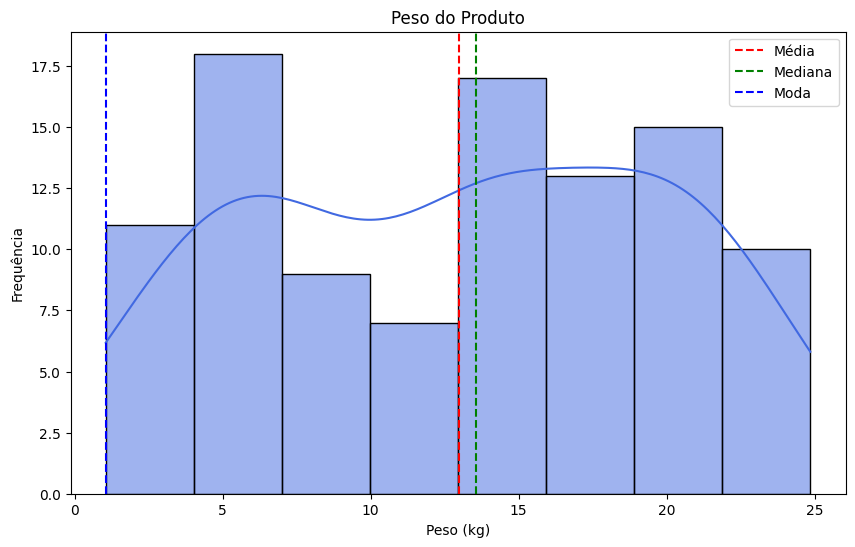

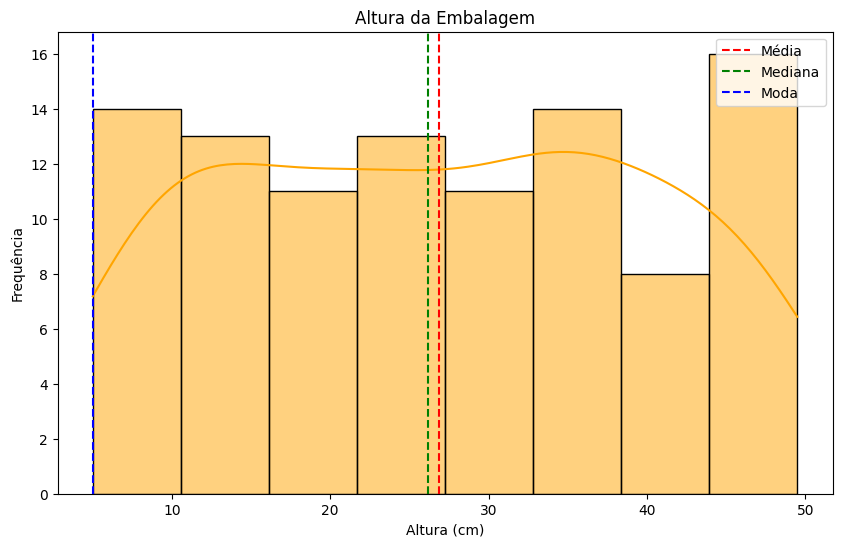

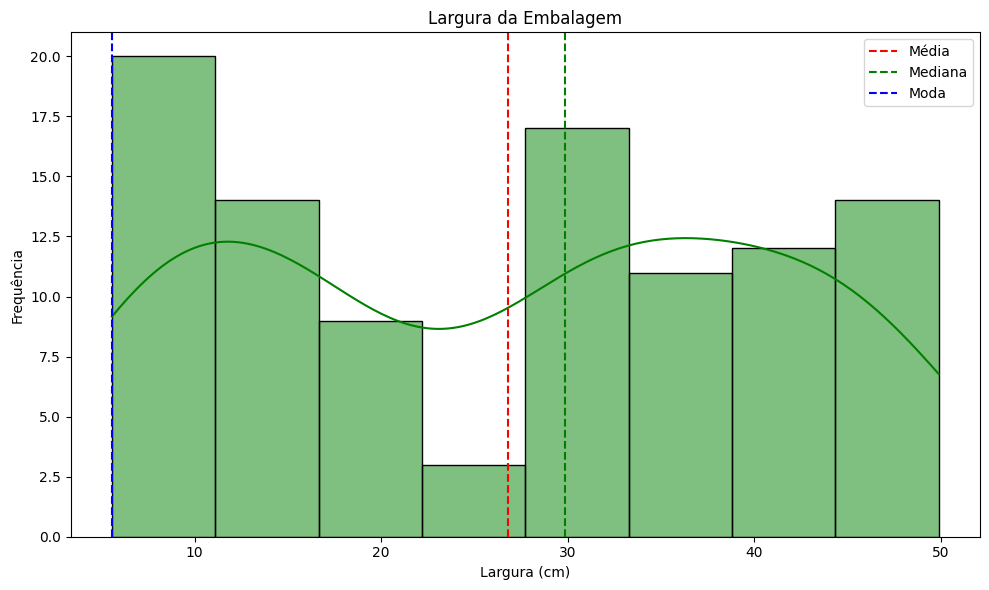

In [9]:
from scipy import stats
def plot_histogram_with_stats(data, column, color, title, xlabel):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=data, x=column, color=color, kde=True, ax=ax)

    # Calcular média, mediana e moda
    mean_value = data[column].mean()
    median_value = data[column].median()
    mode_result = stats.mode(data[column])

    # Verificar se mode_result.mode é um array
    if isinstance(mode_result.mode, np.ndarray):
        mode_value = mode_result.mode[0]
    else:
        mode_value = mode_result.mode

    # Adicionar linhas verticais para média, mediana e moda
    ax.axvline(mean_value, color='red', linestyle='--', label='Média')
    ax.axvline(median_value, color='green', linestyle='--', label='Mediana')
    ax.axvline(mode_value, color='blue', linestyle='--', label='Moda')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequência')
    ax.legend()

# Criar os histogramas
plot_histogram_with_stats(embalagens_data, 'Peso do Produto', 'royalblue', 'Peso do Produto', 'Peso (kg)')
plot_histogram_with_stats(embalagens_data, 'Altura', 'orange', 'Altura da Embalagem', 'Altura (cm)')
plot_histogram_with_stats(embalagens_data, 'Largura', 'green', 'Largura da Embalagem', 'Largura (cm)')

plt.tight_layout()
plt.show()

### Histograma Peso do Produto
* Forma: A distribuição dos dados parece ser levemente assimétrica à direita, com uma cauda mais longa para valores mais altos de peso. Isso indica que há mais produtos com pesos menores do que a média e alguns poucos produtos com pesos significativamente maiores.
* Centralidade: As medidas de centralidade (média, mediana e moda) estão relativamente próximas umas das outras, o que sugere que a distribuição não é extremamente assimétrica.
* Dispersão: A dispersão dos dados é moderada, com a maioria dos pesos concentrados em torno da média.

Insights e Análises:

* Peso Médio: O peso médio dos produtos está localizado em torno de 15 kg, indicando que este é o valor central em torno do qual os pesos se distribuem.
* Variabilidade: A presença de uma cauda à direita sugere que existe uma variabilidade considerável nos pesos dos produtos. Alguns produtos são bem mais leves que a média, enquanto outros são bem mais pesados.
* Produtos Atípicos: A existência de alguns produtos com pesos muito superiores à média pode indicar a presença de outliers ou produtos com características diferentes dos demais.
* Controle de Qualidade: A análise da distribuição dos pesos pode auxiliar no controle de qualidade dos produtos, permitindo identificar possíveis desvios em relação aos padrões estabelecidos.
* Otimização da Produção: Ao entender a distribuição dos pesos, é possível otimizar processos de produção, embalagem e transporte, reduzindo custos e aumentando a eficiência.
* Segmentação de Clientes: A análise da distribuição dos pesos pode auxiliar na segmentação de clientes, permitindo oferecer produtos mais adequados às suas necessidades.

## Histograma Distribuição da Altura das Embalagens

* Forma: A distribuição dos dados parece ser levemente assimétrica à direita, com uma cauda mais longa para valores mais altos de altura. Isso indica que há mais embalagens com alturas menores do que a média e algumas poucas embalagens com alturas significativamente maiores.
* Centralidade: As medidas de centralidade (média, mediana e moda) estão relativamente próximas umas das outras, o que sugere que a distribuição não é extremamente assimétrica.
* Dispersão: A dispersão dos dados é moderada, com a maioria das alturas concentradas em torno da média.

Insights e Análises:

* Altura Média: A altura média das embalagens está localizada em torno de 30 cm, indicando que este é o valor central em torno do qual as alturas se distribuem.
* Variabilidade: A presença de uma cauda à direita sugere que existe uma variabilidade considerável nas alturas das embalagens. Algumas embalagens são bem mais baixas que a média, enquanto outras são bem mais altas.
* Embalagens Atípicas: A existência de algumas embalagens com alturas muito superiores à média pode indicar a presença de outliers ou embalagens com características diferentes dos demais.
* Otimização de Espaço: A análise da distribuição das alturas pode auxiliar na otimização do espaço de armazenamento e transporte, permitindo agrupar embalagens de alturas semelhantes e maximizar a utilização dos recursos.
* Design de Embalagens: A compreensão da distribuição das alturas pode auxiliar no design de embalagens mais eficientes, considerando as dimensões dos produtos e as restrições logísticas.
* Segmentação de Produtos: A análise da distribuição das alturas pode auxiliar na segmentação de produtos, permitindo oferecer embalagens mais adequadas às diferentes categorias de produtos.

## Histograma Distribuição da Largura das Embalagens

* Forma: A distribuição dos dados parece ser levemente assimétrica à direita, com uma cauda mais longa para valores mais altos de largura. Isso indica que há mais embalagens com larguras menores do que a média e algumas poucas embalagens com larguras significativamente maiores.
* Centralidade: As medidas de centralidade (média, mediana e moda) estão relativamente próximas umas das outras, o que sugere que a distribuição não é extremamente assimétrica.
* Dispersão: A dispersão dos dados é moderada, com a maioria das larguras concentradas em torno da média.

Insights e Análises:

* Largura Média: A largura média das embalagens está localizada em torno de 30 cm, indicando que este é o valor central em torno do qual as larguras se distribuem.
* Variabilidade: A presença de uma cauda à direita sugere que existe uma variabilidade considerável nas larguras das embalagens. Algumas embalagens são bem mais estreitas que a média, enquanto outras são bem mais largas.
* Embalagens Atípicas: A existência de algumas embalagens com larguras muito superiores à média pode indicar a presença de outliers ou embalagens com características diferentes dos demais.
* Otimização de Espaço: A análise da distribuição das larguras pode auxiliar na otimização do espaço de armazenamento e transporte, permitindo agrupar embalagens de larguras semelhantes e maximizar a utilização dos recursos.
* Design de Embalagens: A compreensão da distribuição das larguras pode auxiliar no design de embalagens mais eficientes, considerando as dimensões dos produtos e as restrições logísticas.
* Segmentação de Produtos: A análise da distribuição das larguras pode auxiliar na segmentação de produtos, permitindo oferecer embalagens mais adequadas às diferentes categorias de produtos.

<Axes: xlabel='Volume', ylabel='Custo por Unidade de Material'>

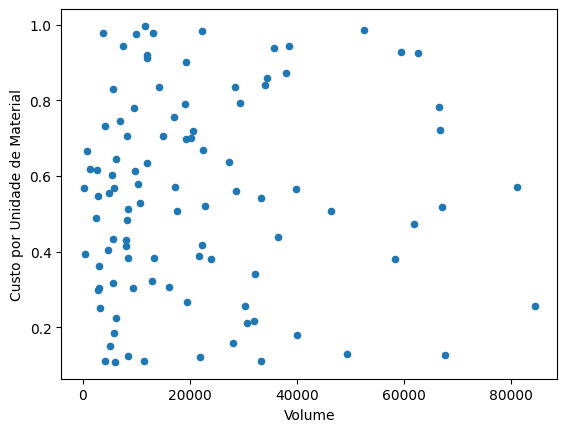

In [10]:
embalagens_data['Volume'] = embalagens_data['Altura'] * embalagens_data['Largura'] * embalagens_data['Profundidade']
embalagens_data.plot.scatter(x='Volume', y='Custo por Unidade de Material')


In [11]:
embalagens_data.groupby('Material de Embalagem').agg({
    'Volume de Vendas': 'sum',
    'Custo por Unidade de Material': 'mean',
    'Volume': 'mean'
}).sort_values(by='Volume de Vendas', ascending=False)


,Volume de Vendas,Custo por Unidade de Material,Volume
Material de Embalagem,,,
Papelão,18782,0.553400,22572.191598
Isopor,16502,0.566766,14164.403734
Plástico,15362,0.518422,27977.122834


### Análises específicas para o dataset "Cubagem Data"

<Axes: >

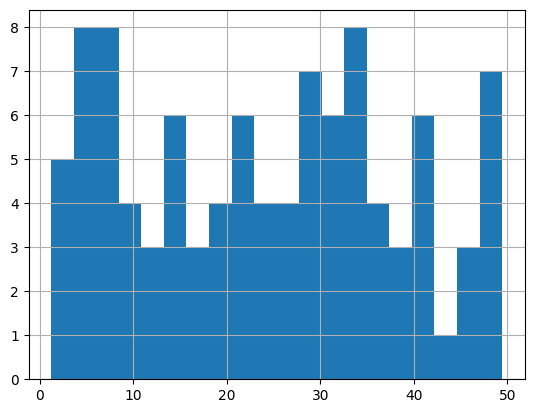

In [12]:
cubagem_data['Peso'].hist(bins=20)


<Axes: ylabel='count'>

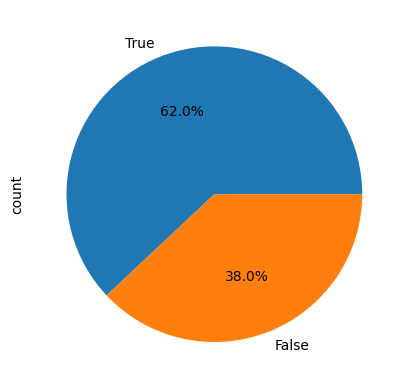

In [13]:
cubagem_data['Fragilidade'].value_counts().plot.pie(autopct='%1.1f%%')


In [14]:
cubagem_data.groupby('Fragilidade').agg({
    'Altura': 'mean',
    'Largura': 'mean',
    'Profundidade': 'mean',
    'Peso': 'mean'
})


,Altura,Largura,Profundidade,Peso
Fragilidade,,,,
False,57.680638,54.444602,55.264378,24.740497
True,57.433412,56.738597,50.883400,23.815338


<Axes: >

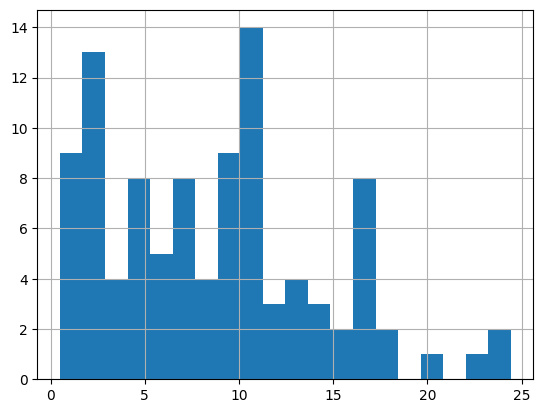

In [15]:
cubagem_data['Utilização Capacidade (%)'] = (cubagem_data['Peso'] / cubagem_data['Capacidade do Veículo']) * 100
cubagem_data['Utilização Capacidade (%)'].hist(bins=20)


<Axes: xlabel='Tipo de Produto'>

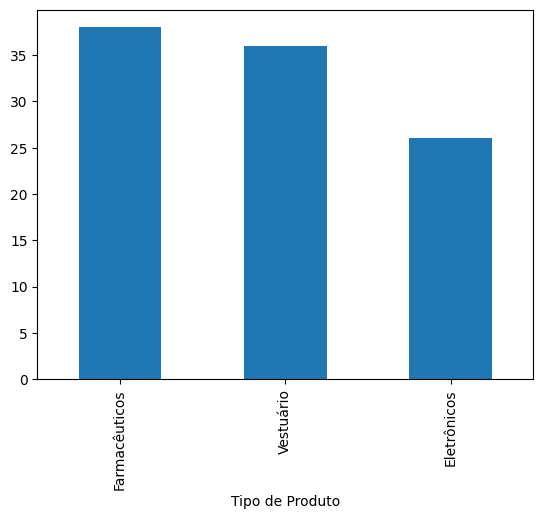

In [16]:
cubagem_data['Tipo de Produto'].value_counts().plot.bar()


### Análises específicas para o dataset "Entregas Data"

<Axes: >

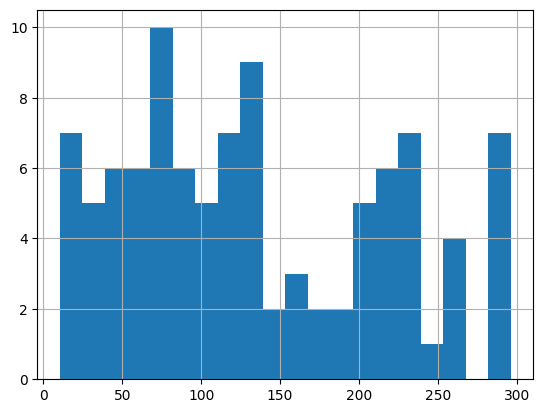

In [17]:
entregas_data['Distância'].hist(bins=20)


<ipython-input-18-7fcc8a4b2f75>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


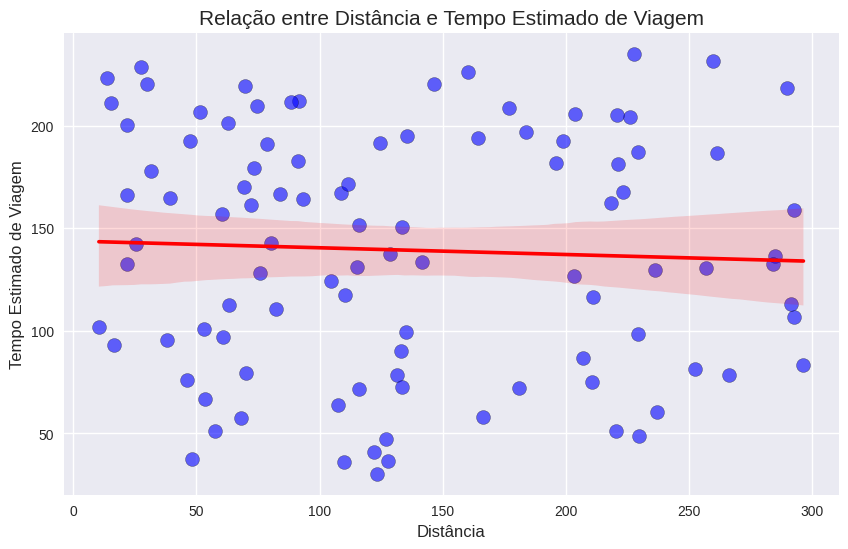

In [18]:
# Definir estilo
plt.style.use('seaborn')

# Criar o gráfico de dispersão com títulos e rótulos
plt.figure(figsize=(10, 6))

# Plotar gráfico
plt.scatter(entregas_data['Distância'], entregas_data['Tempo Estimado de Viagem'],
            c='blue', alpha=0.6, edgecolor='k', s=100)  # Ajuste de cor, bordas e tamanho

# Adicionar títulos e rótulos
plt.title('Relação entre Distância e Tempo Estimado de Viagem', fontsize=15)
plt.xlabel('Distância (km)', fontsize=12)
plt.ylabel('Tempo Estimado de Viagem (min)', fontsize=12)

# Adicionar grade
plt.grid(True)

# Adicionar linha de tendência (opcional, usando a função de regressão do seaborn)
sns.regplot(x='Distância', y='Tempo Estimado de Viagem', data=entregas_data, scatter=False, color='red', line_kws={'label':"Tendência"})

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

* Correlação Positiva Fraca: Existe uma tendência geral de que, à medida que a distância aumenta, o tempo estimado de viagem também tende a aumentar. No entanto, essa relação não é forte e linear, indicando que outros fatores além da distância podem influenciar o tempo de viagem.
* Dispersão dos Dados: Os pontos de dados estão bastante dispersos em torno da linha de tendência, o que indica que a relação entre as duas variáveis não é perfeita e que existem muitas outras variáveis que podem estar influenciando o tempo de viagem.

In [19]:
entregas_data.groupby('Condições de Tráfego').agg({
    'Tempo Estimado de Viagem': 'mean',
    'Distância': 'mean'
})


,Tempo Estimado de Viagem,Distância
Condições de Tráfego,,
Alto,143.717786,146.690001
Baixo,135.068944,130.290324
Médio,139.241450,127.951383


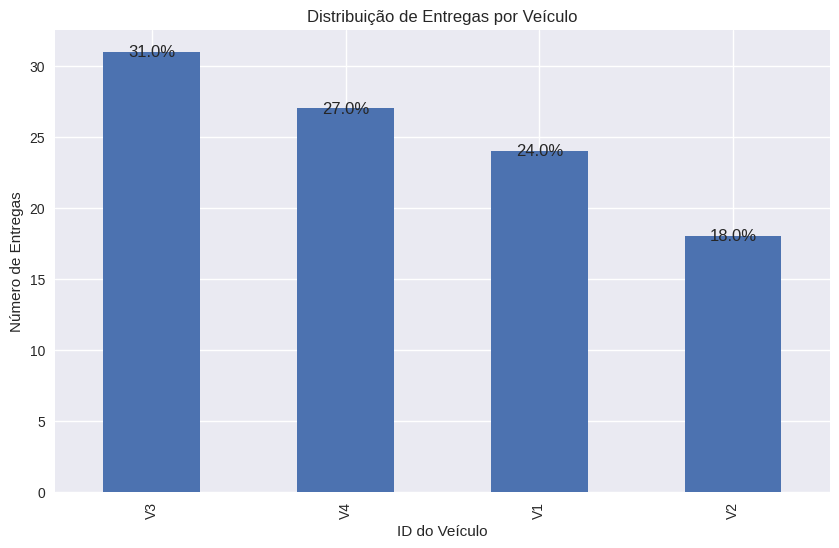

In [20]:
# Contar a frequência de cada ID de veículo
contagem_veiculos = entregas_data['ID do Veículo'].value_counts()

# Calcular as porcentagens
porcentagens = (contagem_veiculos / contagem_veiculos.sum()) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_veiculos.plot.bar()

# Adicionar rótulos com as porcentagens
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12)

# Personalizar o gráfico
plt.title('Distribuição de Entregas por Veículo')
plt.xlabel('ID do Veículo')
plt.ylabel('Número de Entregas')

plt.show()

* Desigualdade na Distribuição:
 * O veículo V3 é responsável por uma parcela significativamente maior de entregas, representando 31% do total.
 * Os veículos V4 e V1 apresentam um volume de entregas similar, em torno de 27% e 24%, respectivamente.
 * O veículo V2 é o que menos realiza entregas, com apenas 18% do total.
 * O veículo V2 parece estar subutilizado em comparação aos demais.

In [21]:
entregas_data.groupby(['Local de Partida', 'Destino da Entrega']).agg({
    'Distância': 'mean',
    'Tempo Estimado de Viagem': 'mean'
})


Distância  Tempo Estimado de Viagem
Local de Partida Destino da Entrega                                      
CD1              Local A             185.155264                144.010931
                 Local B             144.053536                164.185806
                 Local C             120.979378                159.937979
                 Local D             141.967523                163.467108
                 Local E             140.530464                148.894714
CD2              Local A             149.333999                148.841851
                 Local B              70.846379                 84.358156
                 Local C             157.140710                107.325519
                 Local D             143.286659                138.559128
                 Local E             137.228803                150.293556
CD3              Local A             131.348692                147.191884
                 Local B             166.482708                118.013169
                 Local C             113.237587                190.156078
                 Local D              95.019795                127.462955
                 Local E             119.406271                129.479609

## Análise cruzada entre datasets

In [22]:
merged_data = pd.merge(cubagem_data, entregas_data, on='ID do Veículo')
merged_data.groupby('ID do Veículo').agg({
    'Peso': 'sum',
    'Capacidade do Veículo': 'mean',
    'Distância': 'mean',
    'Tempo Estimado de Viagem': 'mean'
})


,Peso,Capacidade do Veículo,Distância,Tempo Estimado de Viagem
ID do Veículo,,,,
V1,18671.350442,300.000000,122.311532,123.813544
V2,16106.867126,317.142857,143.778770,151.558039
V3,23060.618740,296.428571,133.847122,133.149415


## Matriz correlações.

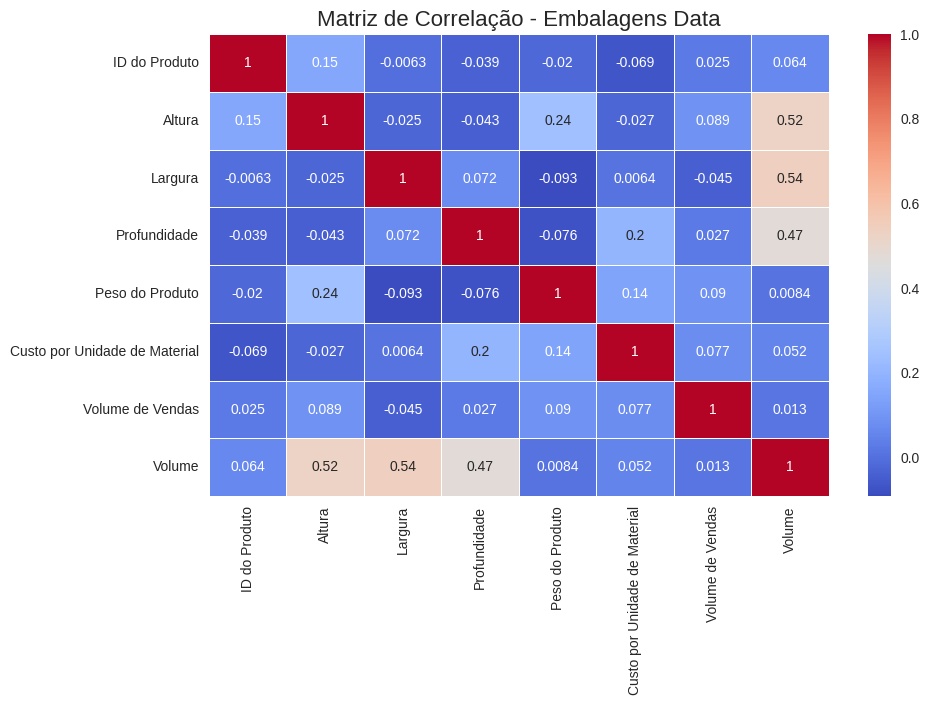

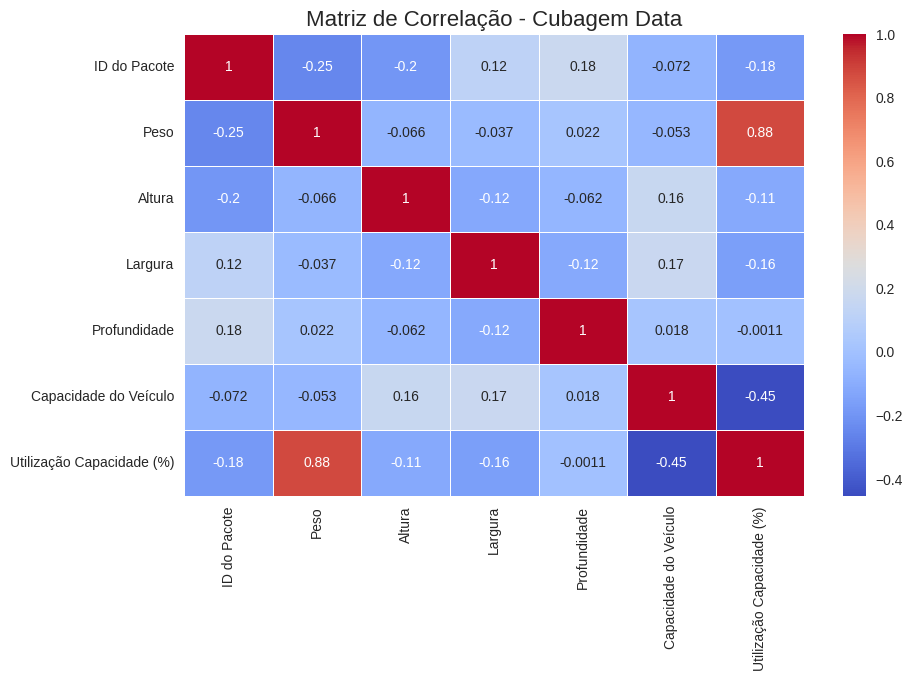

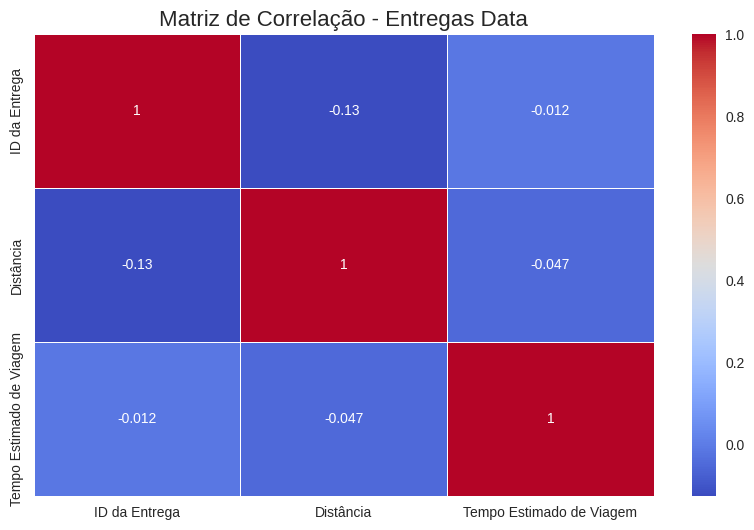

Matriz de Correlação - Embalagens Data:
                               ID do Produto    Altura   Largura  \
ID do Produto                       1.000000  0.153843 -0.006331   
Altura                              0.153843  1.000000 -0.024866   
Largura                            -0.006331 -0.024866  1.000000   
Profundidade                       -0.039347 -0.042988  0.071924   
Peso do Produto                    -0.020033  0.241418 -0.092579   
Custo por Unidade de Material      -0.069413 -0.027071  0.006395   
Volume de Vendas                    0.024725  0.089266 -0.044771   
Volume                              0.063573  0.522844  0.541848   

                               Profundidade  Peso do Produto  \
ID do Produto                     -0.039347        -0.020033   
Altura                            -0.042988         0.241418   
Largura                            0.071924        -0.092579   
Profundidade                       1.000000        -0.076123   
Peso do Produto            

In [23]:
def plot_correlation_matrix(data, title):
    # Selecionar apenas as colunas numéricas
    numerical_data = data.select_dtypes(include=['float64', 'int64'])

    # Calcular a matriz de correlação
    corr_matrix = numerical_data.corr()

    # Plotar a matriz de correlação
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title, fontsize=16)
    plt.show()

    return corr_matrix

# Matriz de correlação para embalagens_data
corr_embalagens = plot_correlation_matrix(embalagens_data, 'Matriz de Correlação - Embalagens Data')

# Matriz de correlação para cubagem_data
corr_cubagem = plot_correlation_matrix(cubagem_data, 'Matriz de Correlação - Cubagem Data')

# Matriz de correlação para entregas_data
corr_entregas = plot_correlation_matrix(entregas_data, 'Matriz de Correlação - Entregas Data')

# Exibir as matrizes
print("Matriz de Correlação - Embalagens Data:")
print(corr_embalagens)
print("\nMatriz de Correlação - Cubagem Data:")
print(corr_cubagem)
print("\nMatriz de Correlação - Entregas Data:")
print(corr_entregas)

1. Matriz de Correlação - Embalagens Data:

* Altura e Volume apresentam uma correlação positiva significativa (+0.52), indicando que produtos mais altos tendem a ter maior volume.
* Largura e Volume também têm uma correlação positiva (+0.54), sugerindo que a largura é igualmente relevante para o volume total do produto.
* Altura e Peso do Produto possuem uma correlação positiva moderada (+0.24), sugerindo que produtos mais altos podem ser um pouco mais pesados, embora a relação não seja muito forte.
* Profundidade e Volume têm uma correlação positiva (+0.47), indicando que produtos mais profundos tendem a ocupar mais espaço.
* A correlação entre o Custo por Unidade de Material e a Profundidade é positiva (+0.20), mas relativamente fraca, mostrando uma leve relação entre a profundidade e o custo do material usado para a embalagem.

2. Matriz de Correlação - Cubagem Data:

* Peso e Utilização de Capacidade (%) têm uma correlação muito forte (+0.88), indicando que o peso do pacote influencia significativamente a capacidade utilizada do veículo.
* Altura e Capacidade do Veículo mostram uma correlação positiva (+0.16), sugerindo que veículos com maior capacidade tendem a lidar com produtos mais altos, embora a relação seja moderada.
* Peso e Capacidade do Veículo têm uma correlação negativa fraca (-0.05), sugerindo que o peso não afeta diretamente a capacidade do veículo disponível.
* Capacidade do Veículo e Utilização de Capacidade (%) têm uma correlação negativa moderada (-0.45), o que pode indicar que veículos com maior capacidade tendem a ser subutilizados.

3. Matriz de Correlação - Entregas Data:

* Distância e Tempo Estimado de Viagem têm uma correlação muito fraca e negativa (-0.05), o que pode indicar que fatores além da distância, como tráfego ou condições da estrada, impactam o tempo de viagem.
* ID da Entrega e Distância possuem uma correlação negativa (-0.12), o que sugere uma pequena tendência de variação da distância dependendo da entrega, embora seja fraca.